# 1. Text processing and classification

<div class = "alert alert-warning">

**Computer vision** : état de l'art relativement stable 
    
**Natural Language Processing** : toutes les semaines des nouveaux modèles qui battent de loin les modèles existants 
    


<div class = "alert alert-warning">

**Qu'est ce qui distingue le langage des autres systèmes de communication?** (langages animaux ou informatiques)
- L'**infinité discrète** : *infinité d'idées avec un nombre fini de symboles*
    - à partir d'un *nombre fini de symboles* (des caractères, des mots, des syllabes ou des gestes) 
    - on peut produire une *infinité de phrases*, de longueur non limité, et on peut exprimer une *infinité d'idées*
    
        
- Le **déplacement** : je peux parler de *choses concrètes ou abstraites ou absentes* (géographiquement ou temporellement)
    - capacité de parler de choses qui ne sont pas ici et maintenant : choses lointaines dans l'espace et dans le temps
    - capacité de parler d'idées abstraites
        - pour le traitement de signal : on peut donc avoir du langage qui parle de choses qui ne sont pas dans le signal et des informations qu'on ne retrouve pas ailleurs
        
        
- L'**attention jointe** : *le langage s'adapte à la personne* qui est en face
    - triange sémiotique de Pierce : les briques nécessaires pour l'humain pour créer du sens à partir du mot
        - le référent : l'objet réel auquel auquel on fait référence
        - le signifiant : le symbole (la suite de caractères) qui indique le référent
        - le signifié : l'image mentale du référent (en stock dans le cerveau qu'on parle de l'objet ou non)
    - le signifiant est arbitraire : les symboles qui représentent l'objet sont arbitraires
        - à partir du moment où deux personnes se mettent d'accord sur le signifiant, ils peuvent toujours communiquer en modifiant ce signifiant 
    - il faut donc que le système qui modélise le langage soit *flexible* : il doit pouvoir s'adapter aux modifications du signifiant


- L'**attachement à une culture** : le langage est *conditionné par la culture* (nationalité, localisation, éducation, etc.) 
    - les individus parlent de façon différentes : on ne peut pas prédire à 100% comment une personne va parler
    

<div class = "alert alert-warning">

**Problème du long-tail** : 
- on a une décroissance linéaire de la fréquence des mots dans un texte (loi de Zipf)
- cette loi a été formalisée par Mandelbrot : coût de stockage et coût d'utilisation des mots

**Loi de Zipf-Mandelbrot** : 
- **loi statique de Shannon** : coût de stockage d'une information est proportionnel au logarithme de la quantité d'information à encoder
- **loi dynamique de Shannon** : à l'optimalité, les symboles les moins fréquents sont affectés aux informations les plus coûteuses à encoder
- **Hypothèse de Mandelbrot** : le coût d'utilisation d'un symbole est directement proportionnel à son coût de stockage

Sur l'ensemble des textes, on a la loi suivante : 

$$ f(n) = \frac{K}{(n+\beta)^\alpha}$$

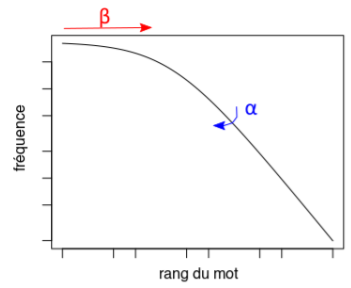

$\alpha$ et $\beta$ dépendent du contexte dans lequel on est (langue, registre, contexte)

**Objectif** : pouvoir classifier - déterminer l'intention du texte

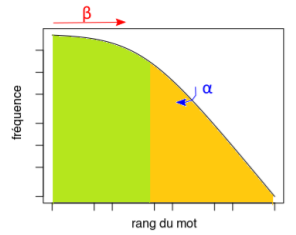

On représente ici en vert les intentions qu'on sait traiter et en orange ceux qu'on ne sait pas traiter 

- On développe par exemple un chatbot qui peut traiter 2000 intentions 
    - le chatbot ne traitera jamais l'ensemble des intentions possibles
- On peut calculer la probabilité de tomber sur une intention qu'on ne sait pas traiter pour un $\alpha$ et un $\beta$ donnés et $\kappa$ le nombre d'intentions qu'on sait traiter

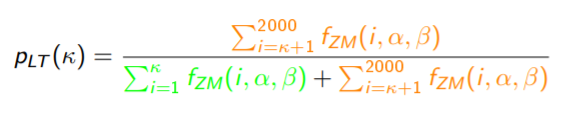

<div class = "alert alert-warning">

**Problèmes communs de bas niveau** : 
- Problèmes centrés sur un token
    - *Sémantique lexicale ou distributionnelle* : modélisation du sens du token
    - *Part-of-speech (POS) tagging* : labellisation du rôle grammatical du token 
        - i.e. nom commun, verbe, pronom...
    - *Named Entity Recognition (NER)* : labellisation des tokens appartenant à une classe défnie 
        - i.e. noms de pays, types de cuisine, noms de personnalités...
- Problèmes centrés sur un groupe de tokens ou une phrase
    - *Classifcation de texte*
    - *Analyse de sentiment ou de tonalité*
    - *Parsing en dépendances* : attribution de relations grammaticales entre parties de la phrase
    - *Extraction de relations* : labellisation de liens de relation entre plusieurs tokens 
        - e.g. détection des *aspects*, i.e. du sentiment associé à un token de la phrase

<div class = "alert alert-warning">
    
**Problèmes communs de haut niveau** : 
- *NLU : Natural language understanding*
    - Compréhension du sens d'un texte ou d'un message 
- *NLG : Natural language generation*
    - Génération de langage ou machine translation et summarization
- *QA : Question Answering*
    - Association d'une question avec sa réponse

<div class = "alert alert-warning">

**Méthodes :**

- *Bag of words* : 
    - on met tous les mots du texte en vrac dans un sac pour faire la classification 
    - on ne prend en compte que la fréquence des mots
- *Représentation TFIDF* :  
    - TFIDF = Term_frequency * inverse(Document_frequency)
    - on ne prend pas en compte les mots très communs qui ne permettent pas de distinguer un texte d'un autre



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Load-the-data" data-toc-modified-id="1.-Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Load the data</a></span></li><li><span><a href="#2.-Filtering-out-the-noise" data-toc-modified-id="2.-Filtering-out-the-noise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Filtering out the noise</a></span></li><li><span><a href="#3.-Even-better-filtering" data-toc-modified-id="3.-Even-better-filtering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Even better filtering</a></span></li><li><span><a href="#4.-Term-frequency-times-inverse-document-frequency" data-toc-modified-id="4.-Term-frequency-times-inverse-document-frequency-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Term frequency times inverse document frequency</a></span></li><li><span><a href="#5.-Utility-function" data-toc-modified-id="5.-Utility-function-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5. Utility function</a></span></li></ul></div>

This notebook is part of the [Machine Learning class](https://github.com/erachelson/MLclass) by [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en).

License: CC-BY-SA-NC.

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Text data pre-processing</div>

In this exercice, we shall load a database of email messages and pre-format them so that we can design automated classification methods or use off-the-shelf classifiers.

"What is there to pre-process?" you might ask. Well, actually, text data comes in a very noisy form that we, humans, have become accustomed to and filter out effortlessly to grasp the core meaning of the text. It has a lot of formatting (fonts, colors, typography...), punctuation, abbreviations, common words, grammatical rules, etc. that we might wish to discard before even starting the data analysis.

Here are some pre-processing steps that can be performed on text:
1. loading the data, removing attachements, merging title and body;
2. tokenizing - splitting the text into atomic "words";
3. removal of stop-words - very common words;
4. removal of non-words - punctuation, numbers, gibberish;
3. lemmatization - merge together "find", "finds", "finder".

The final goal is to be able to represent a document as a mathematical object, e.g. a vector, that our machine learning black boxes can process.

# 1. Text classification in English

## 1.1 Load the data

Let's first load the emails.

In [30]:
import os
data_switch=1
if(data_switch==0):
    train_dir = '../data/ling-spam/train-mails/'
    email_path = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]
else:
    train_dir = '../data/lingspam_public/bare/'
    email_path = []
    email_label = []
    for d in os.listdir(train_dir):
        folder = os.path.join(train_dir,d)
        email_path += [os.path.join(folder,f) for f in os.listdir(folder)]
        email_label += [f[0:3]=='spm' for f in os.listdir(folder)]
print("number of emails",len(email_path))
email_nb = 8 # try 8 for a spam example
print("email file:", email_path[email_nb])
print("email is a spam:", email_label[email_nb])
print(open(email_path[email_nb]).read())

number of emails 2893
email file: ../data/lingspam_public/bare/part1/3-378msg5.txt
email is a spam: False
Subject: t

hi , help ! i have to design an experiment to do with mandarin tones as part of a phonology requirement on my graduate course . there seems to be very little literature on this in the library . if anyone can think of any on-going debates on the phonology / phonetics of mandarin tones for which an experiment would be useful , please could you give me information and references . i would welcome any suggestions at all . thanks a lot , sophia wang . ( sophia @ ling . ed . ac . uk )



## 1.2. Filtering out the noise

One nice thing about scikit-learn is that is has lots of preprocessing utilities. Like [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for instance, that converts a collection of text documents to a matrix of token counts.

- To remove stop-words, we set: `stop_words='english'`
- To convert all words to lowercase: `lowercase=True`
- The default tokenizer in scikit-learn removes punctuation and only keeps words of more than 2 letters.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer(input='filename', stop_words='english', lowercase=True)
word_count = countvect.fit_transform(email_path)

In [32]:
print("Number of documents:", len(email_path))
words = countvect.get_feature_names()
print("Number of words:", len(words))
print("Document - words matrix:", word_count.shape)
print("First words:", words[0:100])

Number of documents: 2893
Number of words: 60618
Document - words matrix: (2893, 60618)
First words: ['00', '000', '0000', '00001', '00003000140', '00003003958', '00007', '0001', '00010', '00014', '0003', '00036', '000bp', '000s', '000yen', '001', '0010', '0010010034', '0011', '00133', '0014', '00170', '0019', '00198', '002', '002656', '0027', '003', '0030', '0031', '00333', '0037', '0039', '003n7', '004', '0041', '0044', '0049', '005', '0057', '006', '0067', '007', '00710', '0073', '0074', '00799', '008', '009', '00919680', '0094', '00a', '00am', '00arrival', '00b', '00coffee', '00congress', '00d', '00dinner', '00f', '00h', '00hfstahlke', '00i', '00j', '00l', '00m', '00p', '00pm', '00r', '00t', '00tea', '00the', '00uzheb', '01', '0100', '01003', '01006', '0104', '0106', '01075', '0108', '011', '0111', '0117', '0118', '01202', '01222', '01223', '01225', '01232', '01235', '01273', '013', '0131', '01334', '0135', '01364', '0139', '013953', '013a']


/home/ymycandy/anaconda3/envs/pyseminar/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 1.3. Even better filtering

That's already quite ok, but this pre-processing does not perform lemmatization, the list of stop-words could be better and we could wish to remove non-english words (misspelled, with numbers, etc.).

A slightly better preprocessing uses the [Natural Language Toolkit](https://www.nltk.org/https://www.nltk.org/). The one below:
- tokenizes;
- removes punctuation;
- removes stop-words;
- removes non-English and misspelled words (optional);
- removes 1-character words;
- removes non-alphabetical words (numbers and codes essentially).

In [33]:
import nltk
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package words to /home/ymycandy/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ymycandy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ymycandy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk import wordpunct_tokenize          
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import words
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer

class LemmaTokenizer(object):
    def __init__(self, remove_non_words=True):
        self.wnl = WordNetLemmatizer()
        self.stopwords = set(stopwords.words('english'))
        self.words = set(words.words())
        self.remove_non_words = remove_non_words
    def __call__(self, doc):
        # tokenize words and punctuation
        word_list = wordpunct_tokenize(doc)
        # remove stopwords
        word_list = [word for word in word_list if word not in self.stopwords]
        # remove non words
        if(self.remove_non_words):
            word_list = [word for word in word_list if word in self.words]
        # remove 1-character words
        word_list = [word for word in word_list if len(word)>1]
        # remove non alpha
        word_list = [word for word in word_list if word.isalpha()]
        return [self.wnl.lemmatize(t) for t in word_list]

The LemmaTokenizer defined above will be applied further in this example. The next step is to define the Count Vectorization pipeline using this Tokenizer.

In [35]:
countvect = CountVectorizer(input='filename',tokenizer=LemmaTokenizer(remove_non_words=True))
bow = countvect.fit_transform(email_path) #bag of words
feat2word = {v: k for k, v in countvect.vocabulary_.items()}

In [36]:
print("Number of documents:", len(email_path))
words = countvect.get_feature_names()
print("Number of words:", len(words))
print("Document - words matrix:", bow.shape)
print("First words:", words[0:100])

Number of documents: 2893
Number of words: 14279
Document - words matrix: (2893, 14279)
First words: ['aa', 'aal', 'aba', 'aback', 'abacus', 'abandon', 'abandoned', 'abandonment', 'abbas', 'abbreviation', 'abdomen', 'abduction', 'abed', 'aberrant', 'aberration', 'abide', 'abiding', 'abigail', 'ability', 'ablative', 'ablaut', 'able', 'abler', 'aboard', 'abolition', 'abord', 'aboriginal', 'aborigine', 'abound', 'abox', 'abreast', 'abridged', 'abroad', 'abrogate', 'abrook', 'abruptly', 'abscissa', 'absence', 'absent', 'absolute', 'absolutely', 'absoluteness', 'absolutist', 'absolutive', 'absolutization', 'absorbed', 'absorption', 'abstract', 'abstraction', 'abstractly', 'abstractness', 'absurd', 'absurdity', 'abu', 'abundance', 'abundant', 'abuse', 'abusive', 'abyss', 'academe', 'academic', 'academically', 'academician', 'academy', 'accelerate', 'accelerated', 'accelerative', 'accent', 'accentuate', 'accentuation', 'accept', 'acceptability', 'acceptable', 'acceptance', 'acceptation', 'acc

## 1.4. Using the bag of words (BOW) object to classify spam

Let's start by splitting the data into train and test sets, using 20% of the data for testing

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bow,email_label,test_size=0.2)

In this simple example we will use a Logistic Regression Classifier. Let's fit it to our Training Data

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_classifier=LogisticRegression()
lr_classifier.fit(X_train,y_train)

y_predicted = lr_classifier.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_test,y_predicted))
print("Precision :",metrics.precision_score(y_test,y_predicted))
print("Recall :",metrics.recall_score(y_test,y_predicted))

Accuracy : 0.9879101899827288
Precision : 0.9897959183673469
Recall : 0.941747572815534


<div class = "alert alert-warning">

La représentation bag of words est très efficace

In many cases, Bag of Words can provide sufficient information for classification. In this case, the accuracy reached by our classifier is pretty good.

## 1.5. Term frequency times inverse document frequency

After this first preprocessing, each document is summarized by a vector of size "number of words in the extracted dictionnary". For example, the first email in the list has become:

In [39]:
mail_number = 0
text = open(email_path[mail_number]).read()
print("Original email:")
print(text)

emailBagOfWords = {feat2word[i]: bow[mail_number, i] for i in bow[mail_number, :].nonzero()[1]}
print("Bag of words representation (", len(emailBagOfWords), " words in dict):", sep='')
print(emailBagOfWords)
print("\nVector reprensentation (", bow[mail_number, :].nonzero()[1].shape[0], " non-zero elements):", sep='')
print(bow[mail_number, :])

Original email:
Subject: re : 2 . 882 s - > np np

> date : sun , 15 dec 91 02 : 25 : 02 est > from : michael < mmorse @ vm1 . yorku . ca > > subject : re : 2 . 864 queries > > wlodek zadrozny asks if there is " anything interesting " to be said > about the construction " s > np np " . . . second , > and very much related : might we consider the construction to be a form > of what has been discussed on this list of late as reduplication ? the > logical sense of " john mcnamara the name " is tautologous and thus , at > that level , indistinguishable from " well , well now , what have we here ? " . to say that ' john mcnamara the name ' is tautologous is to give support to those who say that a logic-based semantics is irrelevant to natural language . in what sense is it tautologous ? it supplies the value of an attribute followed by the attribute of which it is the value . if in fact the value of the name-attribute for the relevant entity were ' chaim shmendrik ' , ' john mcnamara the na

Counting words is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called `tf` for Term Frequencies.

Another refinement on top of `tf` is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called `tf–idf` for “Term Frequency times Inverse Document Frequency” and again, scikit-learn does the job for us with the [TfidfTransformer](scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) function.

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit_transform(bow)
tfidf.shape

(2893, 14279)

Let's run the classification process again

In [41]:
X_train, X_test, y_train, y_test = train_test_split(tfidf,email_label,test_size=0.2)

#Fitting classifier
lr_classifier.fit(X_train,y_train)

#Testing classifier
y_predicted = lr_classifier.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_test,y_predicted))
print("Precision :",metrics.precision_score(y_test,y_predicted))
print("Recall :",metrics.recall_score(y_test,y_predicted))

Accuracy : 0.9620034542314335
Precision : 1.0
Recall : 0.7821782178217822


<div class = "alert alert-warning">

Très efficace également

In this simplae case, additional filtering is unecessary and even removed some information. There is indeed likely a link between the abundance of words/long emails and the fact that this email is a spam.

<div class = "alert alert-warning">

Ces deux représentations du texte sont très efficace si on veut apprendre une classification, mais cela ne nous donne pas d'indication sur l'intention du texte.

# 2. Text classification in French

The previously used dataset is a widely used dataset for introductory text classification. 

The field of Natural Language Understanding, and Natural Language Classification in particular, suffers from two challenges :
- Adapting the features and methodologies to various and more complex datasets
- Adapting the process to languages other than english

Concerning the latter, one has to take into account that most of NLU research is currently performed on english. Datasets are rarely available for other languages, and the algorithms proposed for better NLU are often left untested on foreign data. 
French, for instance, has less efficient lemmatization (french is a richly flected language). In the following section, we will reuse the same methodologies on a french dataset.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

#load video games reviews
vgr = pd.read_csv("datasets/jvc.csv")
vgr.head()

,Unnamed: 0,game_fr,game_en,platform,website_rating,public_rating,publishor/developer,release,type,classification,url,description
0,1,.hack//G.U. Last Recode,.hack//G.U. Last Recode,PS4,14/20,--/20,Bandai Namco Entertainment,03 Novembre 2017,RPG,+12 ans,http://www.jeuxvideo.com/jeux/ps4/jeu-674262/,"Au contraire d’autres titres, None ,''.hack'' ..."
1,2,.hack//G.U. Vol.1//Rebirth,.hack//G.U. Vol. 1//Rebirth,PS2,15/20,18.2/20,Bandai Namco CyberConnect2,Date de sortie inconnue,RPG,+7 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Avec plus de 20 œuvres de fiction sur de mult...
2,3,.hack//Infection Part 1,.hack//Infection: Part 1,PS2,15/20,15.1/20,CyberConnect2 Bandai,26 Mars 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,S'appuyant sur la maxime « Mieux vaut tard qu...
3,4,.hack//Mutation Part 2,.hack//Mutation: Part 2,PS2,14/20,16.4/20,Bandai CyberConnect2,18 Juin 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Voici enfin le second volet de la quadrilogie...
4,5,.hack//Outbreak Part 3,.hack//Outbreak: Part 3,PS2,13/20,15.3/20,CyberConnect2 Atari,17 Septembre 2004,RPG,+12 ans,http://www.jeuxvideo.com/jeux/playstation-2-ps...,Comme la maxime «Jamais deux sans trois» ne c...


<AxesSubplot:ylabel='Frequency'>

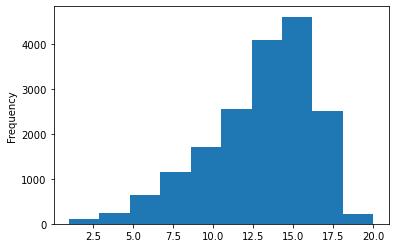

In [43]:
#convert rating to numeric values, and plot the histogram of values
rating=vgr.website_rating.apply(lambda k: k[:-3])
vgr['rating']=pd.to_numeric(rating)
vgr.rating.plot.hist()

<div class = "alert alert-warning">

Peut on distinguer les très mauvais (note<11) des très bon jeux (note>16) à partir d'un résumé d'un review d'un jeux? 

Most games seem to have a rating between 11 and 16. In this exercise, we will try to determine if we can determine if a game is very good (rating above 16) or very bad (rating below 11) based only on the summary of its review.

Let's start by splitting the dataset between good and bad games

In [44]:
bad=vgr[(vgr.rating<=11) & (vgr.platform=="PC")]
bad['quality']=pd.Series(["bad"]*len(bad.index),index=bad.index)
good=vgr[(vgr.rating>=16) & (vgr.platform=="PC")]
good['quality']=pd.Series(["good"]*len(good.index),index=good.index)
selected_games=pd.concat([good,bad]).dropna()

#Keep only reviews and 
game_reviews=selected_games['description']
game_quality=selected_games['quality']


/tmp/ipykernel_1648/1438388647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['quality']=pd.Series(["bad"]*len(bad.index),index=bad.index)
/tmp/ipykernel_1648/1438388647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['quality']=pd.Series(["good"]*len(good.index),index=good.index)


Lemmatization in French is a tricky issue.

One example : the verb finir can be expressed as finissons, finirez, finisse, finit, etc...
Lemmatization is typically less efficient in french than in english. 

Another alternative is to use Stemming instead. Stemming uses RegEx rules to truncate the end of a word that would normally correspond to conjugations, inflections, etc...
Stemming destructs the readability of the words by truncating their end, but runs faster than Lemmatization

In the next cell, we adapt the LemmaTokenizer that we defined earlier using a FrenchStemmer instead. 

In [45]:
from nltk.stem.snowball import FrenchStemmer
from nltk import wordpunct_tokenize          
from nltk.corpus import stopwords
from nltk.corpus import words
from string import punctuation
class FrenchStemTokenizer(object):
    def __init__(self, remove_non_words=True):
        self.st = FrenchStemmer()
        self.stopwords = set(stopwords.words('french'))
        self.words = set(words.words())
        self.remove_non_words = remove_non_words
    def __call__(self, doc):
        # tokenize words and punctuation
        word_list = wordpunct_tokenize(doc)
        # remove stopwords
        word_list = [word for word in word_list if word not in self.stopwords]
        # remove non words
        if(self.remove_non_words):
            word_list = [word for word in word_list if word in self.words]
        # remove 1-character words
        word_list = [word for word in word_list if len(word)>1]
        # remove non alpha
        word_list = [word for word in word_list if word.isalpha()]
        return [self.st.stem(t) for t in word_list]

countvect = CountVectorizer(tokenizer=FrenchStemTokenizer(remove_non_words=True))
bow_games = countvect.fit_transform(game_reviews)
feat2word = {v: k for k, v in countvect.vocabulary_.items()}

### Classify with BOW

In [46]:
print("Number of documents:", len(game_reviews))
words = countvect.get_feature_names()
print("Number of words:", len(words))
print("Document - words matrix:", bow_games.shape)
print("First words:", words[0:100])

Number of documents: 2349
Number of words: 3161
Document - words matrix: (2349, 3161)
First words: ['abandon', 'abomin', 'abord', 'abras', 'absenc', 'absolut', 'absorb', 'abstract', 'abyssal', 'academy', 'accent', 'accept', 'access', 'accessibl', 'acclaim', 'accord', 'accouch', 'accru', 'accus', 'ace', 'aci', 'acolyt', 'acquisit', 'acquit', 'acquitt', 'act', 'action', 'activ', 'activity', 'actual', 'ad', 'adag', 'adapt', 'add', 'addict', 'addit', 'adieu', 'adieux', 'admir', 'adolescent', 'adopt', 'ador', 'adrenalin', 'adroit', 'advanc', 'advanced', 'adventur', 'advers', 'aero', 'affect', 'affili', 'affirm', 'affluenc', 'afflux', 'affront', 'afraid', 'after', 'afterbirth', 'against', 'age', 'agend', 'agent', 'aggress', 'agit', 'agon', 'agricol', 'agricultur', 'ah', 'aid', 'aiguill', 'aim', 'aion', 'air', 'al', 'alan', 'album', 'alfa', 'ali', 'alien', 'align', 'aliment', 'aliv', 'all', 'allan', 'allemand', 'aller', 'allianc', 'allur', 'allus', 'almost', 'alon', 'alpha', 'alphabet', 'alte

/home/ymycandy/anaconda3/envs/pyseminar/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(bow_games,game_quality,test_size=0.2)

#Fitting classifier
lr_classifier.fit(X_train,y_train)

#Testing classifier
y_predicted = lr_classifier.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_test,y_predicted))
print("Precision :",metrics.precision_score(y_test,y_predicted,pos_label="good"))
print("Recall :",metrics.recall_score(y_test,y_predicted,pos_label="good"))

Accuracy : 0.6361702127659574
Precision : 0.642023346303502
Recall : 0.6762295081967213


### Classify using tf-idf

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_games = TfidfTransformer().fit_transform(bow_games)
tfidf_games.shape

(2349, 3161)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_games,game_quality,test_size=0.2)

#Fitting classifier
lr_classifier.fit(X_train,y_train)

#Testing classifier
y_predicted = lr_classifier.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_test,y_predicted))
print("Precision :",metrics.precision_score(y_test,y_predicted,pos_label="good"))
print("Recall :",metrics.recall_score(y_test,y_predicted,pos_label="good"))

Accuracy : 0.6531914893617021
Precision : 0.6312056737588653
Recall : 0.7510548523206751


## Word2Vec

Tfidf and Bow are usually very efficient features to manipulate during cassification. However, please note that their size is directly related to the size of the vocabulary of our corpus. 

In our current example, even when using stemming, the dimensionnality of our bow or tfidf vectors is still very high (3161). This is not maintaintable with increasing corpora sizes.

In this sction, we will use the word2vec embeddings, that address this issue by proposing an architecture that learns individual representations for words in a vector space of given dimension.

<div class = "alert alert-warning">

#### Word2Vec (2012)
    
**CBOW : Continuous Bag of Words**
- On prend un mot du corpus, on isole son contexte et on regarde si on est capable de prédire le token du milieu à partir des tokens qui l'entourent
    - Ex : "je mange une *pomme* en dessert"
    - Est-ce que la machine peut prédire pomme si je lui donne "mange une ___ en dessert"
    - On entraîne le réseau à prédire un mot manquant sur un corpus de texte très large
- Structure du réseau : 
    - En entrée : taille du vocabulaire
    - Couche cachée : taille à décider mais plus faible que la taille du vocabulaire
        - on impose un certain niveau de généralisation 
        - cela permet de contrôler la dimension du problème
    - En sortie : taille du vocabulaire

**Skipgram**
- L'inverse de *CBOW* : on prend un mot et on essaie de prédire son contexte 


Ces modèles ont tendance à apprendre des règles d'**algèbre linguistique**
- Exemple : *roi* - *homme* + *femme* = *reine*
- Contre-exemple : *un* + *un* ne donne pas *deux*
- Les Word2Vec apprennent des structures imparfaites sur les sens des mots 

In [50]:
from nltk.stem.snowball import FrenchStemmer
from nltk import wordpunct_tokenize          
from nltk.corpus import stopwords
from nltk.corpus import words
from string import punctuation
import unidecode

class FrenchTokenizer(object):
    def __init__(self):
        self.stopwords = set(stopwords.words('french'))
        self.words = set(words.words())
    def __call__(self, doc):
        # tokenize words and punctuation
        word_list = wordpunct_tokenize(doc)
        # remove stopwords
        word_list = [word for word in word_list if word not in self.stopwords]
        # remove 1-character words
        word_list = [word for word in word_list if len(word)>1]
        # remove non alpha
        word_list = [word for word in word_list if word.isalpha()]
        return [unidecode.unidecode(t) for t in word_list]

tok=FrenchTokenizer()

text_for_word2vec=[tok(sent) for sent in game_reviews]

The operation above will tokenize all texts by keeping stemmed tokens. Please note the following choices :
- we have applied stemming in order to reduce the dimensionality of our feature space
- we have removed stop words, in order to not let context be learned with it. (depending on the use case, you may want to keep them or remove them)

We can now train the Word2Vec model :

In [51]:
from gensim.models import Word2Vec

model=Word2Vec(text_for_word2vec,size=200,window=5,min_count=1)
model.save("word2vec.model")
w2v=dict(zip(model.wv.index2word, model.wv.vectors))

TypeError: __init__() got an unexpected keyword argument 'size'

Let's check word similarity in our trained data :

In [52]:
model.wv.most_similar(positive="jeu")

NameError: name 'model' is not defined

Let's now try again to classify our samples using these embddings

In [53]:
class MeanEmbeddingVectorizer(object):
    def __init__(self,word2vec,dim):
        self.word2vec=word2vec
        self.dim=dim
        
    def fit(self,X,y):
        return self
    
    def transform(self,X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [54]:
from sklearn.pipeline import Pipeline
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(game_reviews,game_quality,test_size=0.2)

pipe=Pipeline([('vectorizer',MeanEmbeddingVectorizer(w2v,200)),('classifier',lr_classifier)])

pipe.fit(X_train,y_train)

NameError: name 'w2v' is not defined

In [55]:
predicted = pipe.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_test,predicted))
print("Precision :",metrics.precision_score(y_test,predicted,pos_label="good"))
print("Recall :",metrics.recall_score(y_test,predicted,pos_label="good"))

NameError: name 'pipe' is not defined

What we observe here is that word2vec embeddings perform worse than what we learned from BOW or TFIDF. 

In our case, the training corpus for the embeddings was not large enough to ensure proper convergence and representation of the words.

It is also common that for smaller corpora (<10.000 docs approximately), TFIDF usually performs better for classification, whereas Word2Vec produces better results with larger corpora and across domains (e.g. training on data from Wikipedia, and then using the vectors on data from another field)


<div class = "alert alert-warning">

On n'a toujorus pas fait de RNN : les RNN sont utiles seulement quand on veut prédire à partir d'une séquence de mots où l'ordre des mots est importants. 

Par exemple, on a besoin de RNN pour :
- Génération de langage naturel
- Traduction automatique de texte

<div class = "alert alert-warning">

**Problème restant** : 
- on ne sait pas gérer les **OOV** (Out of Vocabulary) - les mots qui ne sont pas dans le corpus d'apprentissage
- il peut y avoir des problème de **polysémie** mots avec plusieurs sens : on fait alors un clustering sur les contextes 
    
**Glove** (2014): 
- Plutôt que des clusters, on utilise les co-occurrences des tokens pour guider l’apprentissage
- Cela permet d’avoir une représentation proche du corpus, et de limiter la quantité de données nécessaire pour l’apprentissage
    
**FastText** (2016): 
- Utilisation des subwords units
    - on coupe les mots en sous ensembles de plusieurs lettres
    
    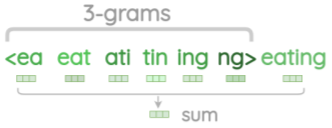
    
    
- Cela permet d’avoir une représentation proche pour des mots contenant une faute d’orthographe, ou un mot n’existant pas dans le vocabulaire (OOV)

<div class = "alert alert-warning">

#### Méthodes Seq2Seq

On a une séquence de texte en français en entrée qu'on cherche à traduire en une séquence de texte en anglaus en sortie

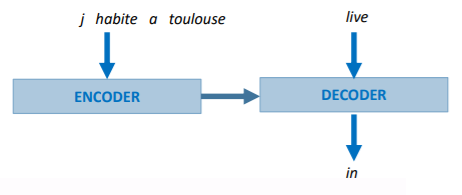

- On encode la phrase d'entrée : on le transforme en vecteur qui contient le concept qu'on cherche à communiquer
    - On prend le dernier état caché du RNN (encodeur français) 
    - Il est passé par tous les états et donc contient le message entier 
- On le fait passer par un décodeur qui décoded l'idée contenue dans le vecteur en une phrase en anglais
    - On fait passer ce dernier état par le RNN (décodeur anglais) qui produit la séquence de sortie 